In [1]:
import numpy as np
import quadripole as quad

In [2]:
a = quad.quadripole(z = np.array([[1, 2], [3, 4]]))
b = quad.quadripole(y = np.array([[11, 12], [31, 14]]))

In [3]:
c = a.shunt(b)
print(c.y())

[[inf  0.]
 [ 0. inf]]


/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:86: RuntimeWarning: overflow encountered in power
  y = 10**(y/20)
/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:105: RuntimeWarning: invalid value encountered in double_scalars
  self.z11 =  self.y22/abs(Y)
/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:108: RuntimeWarning: invalid value encountered in double_scalars
  self.z22 =  self.y11/abs(Y)
/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  self.B = -1/self.y21
/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:119: RuntimeWarning: invalid value encountered in double_scalars
  self.S11 =  ((1 - (self.y11*Z0))*(1 + (self.y22*Z0)) + ((self.y12*Z0)*(self.y21*Z0)))/Delta_2
/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:122: RuntimeWarning: invalid value encountered in double_scalars
  self.S22 =  ((1 + (self.y11*Z0))*(1 - (self.y22*Z0)) + ((self.y12*Z0)*(self.z21*Z0))

In [4]:
d = a.cascade(c)
print(d.ABCD())
print(d.S())

[[nan  0.]
 [nan  0.]]
[[nan nan]
 [nan nan]]


/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:136: RuntimeWarning: invalid value encountered in double_scalars
  temp_A = self.A * qDevice.A + self.B * qDevice.C
/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:138: RuntimeWarning: invalid value encountered in double_scalars
  temp_C = self.C * qDevice.A + self.D * qDevice.C
/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:149: RuntimeWarning: invalid value encountered in double_scalars
  self.y11 =  self.D/self.B
/home/rsmarinho/Documents/posdoc/microwave/quadripole.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  self.y21 = -1/self.B


In [5]:
print(b.cascade(a).S())

[[-0.97469238  0.05383445]
 [ 0.02520609 -0.90827932]]


In [6]:
import pandas as pd

In [7]:
from pathlib import Path
import pandas as pd

file = Path('LNA_Filtre_22112022.csv')
file_extension = file.suffix.lower()[1:]

if file_extension == 'xlsx':
    df = pd.read_excel(file, engine='openpyxl')
elif file_extension == 'xls':
    df = pd.read_excel(file)
elif file_extension == 'csv':
    df = pd.read_csv(file)
else:
    raise Exception("File not supported")


print(df.keys())

Index(['frequency_filtre', 'NF_01_filtre', 'S11_01_filtre', 'S21_01_filtre',
       'S12_01_filtre', 'S22_01_filtre', 'NF_01s_filtre', 'S11_01s_filtre',
       'S21_01s_filtre', 'S12_01s_filtre', 'S22_01s_filtre', 'NF_02_filtre',
       'S11_02_filtre', 'S21_02_filtre', 'S12_02_filtre', 'S22_02_filtre',
       'NF_02s_filtre', 'S11_02s_filtre', 'S21_02s_filtre', 'S12_02s_filtre',
       'S22_02s_filtre', 'NF_03_filtre', 'S11_03_filtre', 'S21_03_filtre',
       'S12_03_filtre', 'S22_03_filtre', 'NF_03s_filtre', 'S11_03s_filtre',
       'S21_03s_filtre', 'S12_03s_filtre', 'S22_03s_filtre'],
      dtype='object')


In [8]:
s11 = df['S11_01_filtre'].to_numpy()
s21 = df['S21_01_filtre'].to_numpy()
s12 = df['S12_01_filtre'].to_numpy()
s22 = df['S22_01_filtre'].to_numpy()

lna = quad.quadripole(S = np.array([[s11, s21], [s12, s22]]))

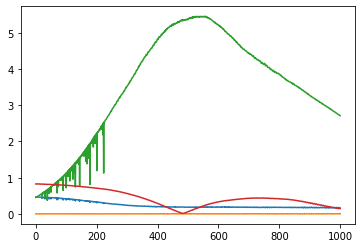

In [9]:
import matplotlib.pylab as plt
plt.plot(lna.S()[0,0,:])
plt.plot(lna.S()[0,1,:])
plt.plot(lna.S()[1,0,:])
plt.plot(lna.S()[1,1,:])

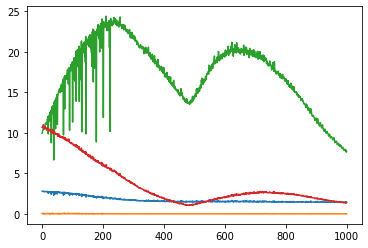

In [10]:
plt.plot(lna.z()[0,0,:])
plt.plot(lna.z()[0,1,:])
plt.plot(lna.z()[1,0,:])
plt.plot(lna.z()[1,1,:])

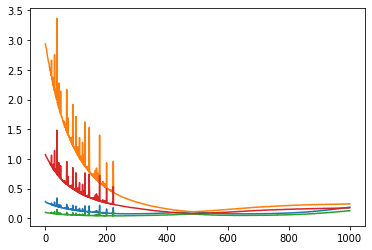

In [11]:
plt.plot(lna.ABCD()[0,0,:])
plt.plot(lna.ABCD()[0,1,:])
plt.plot(lna.ABCD()[1,0,:])
plt.plot(lna.ABCD()[1,1,:])